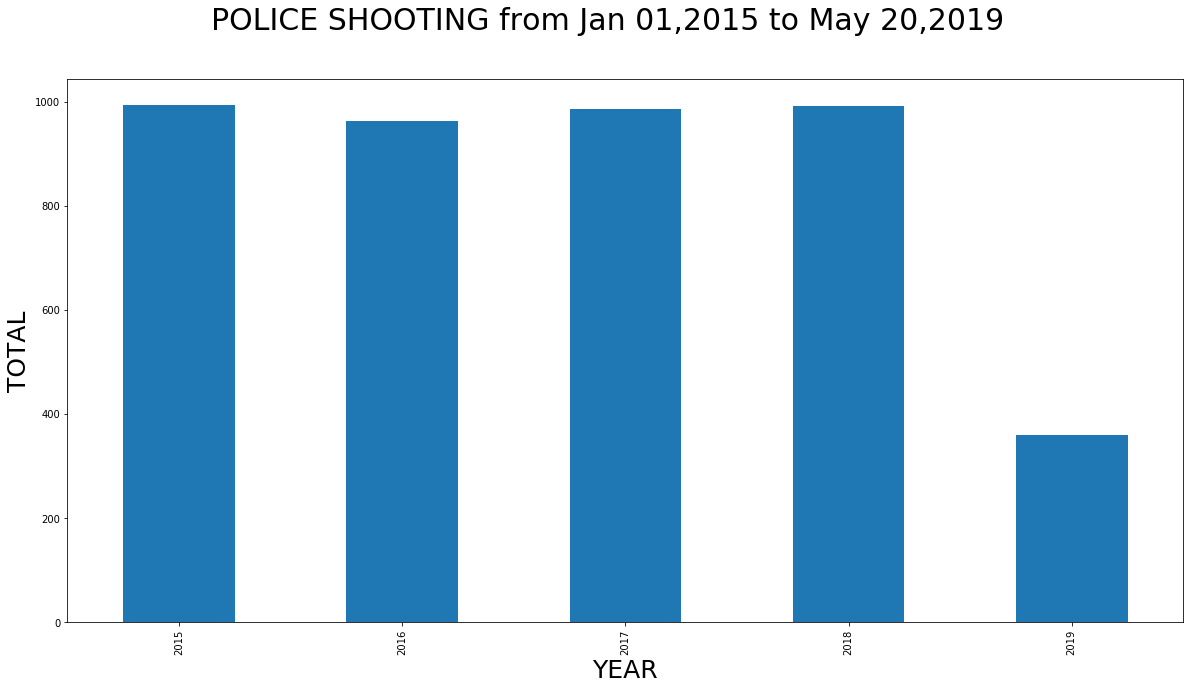

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('police_shootings.csv')
dyear=df['year'].value_counts()
plt.figure(figsize=(20,10))
s = dyear.sort_index().plot.bar()
plt.xlabel('YEAR',fontsize=25)
plt.ylabel('TOTAL',fontsize=25)
plt.suptitle('POLICE SHOOTING from Jan 01,2015 to May 20,2019',fontsize=30)
plt.show()

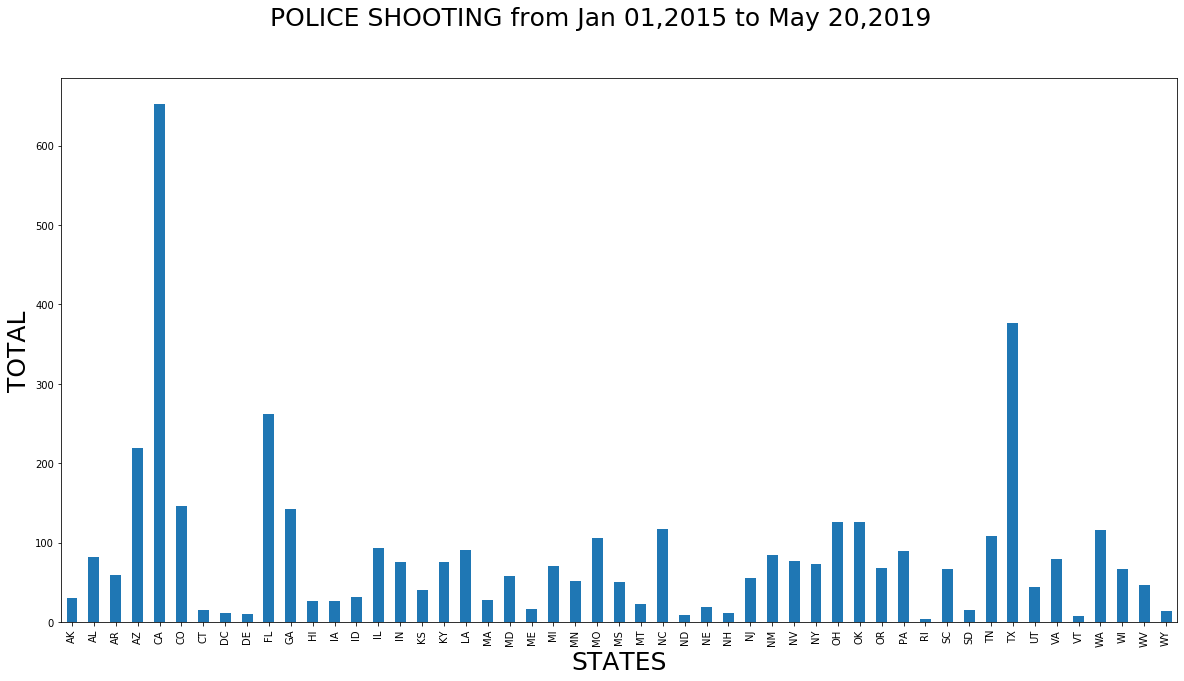

In [48]:
dstate=df['state'].value_counts()
plt.figure(figsize=(20,10))
s = dstate.sort_index().plot.bar()
plt.xlabel('STATES',fontsize=25)
plt.ylabel('TOTAL',fontsize=25)
plt.suptitle('POLICE SHOOTING from Jan 01,2015 to May 20,2019',fontsize=25)
plt.show()

MALE AGEs
   less than 19:  314
     19  to  30:  1291
     31  to  47:  1657
     48  to  60:  622
greater than 60:  205
Under 30 years =  39.251650770359504 %


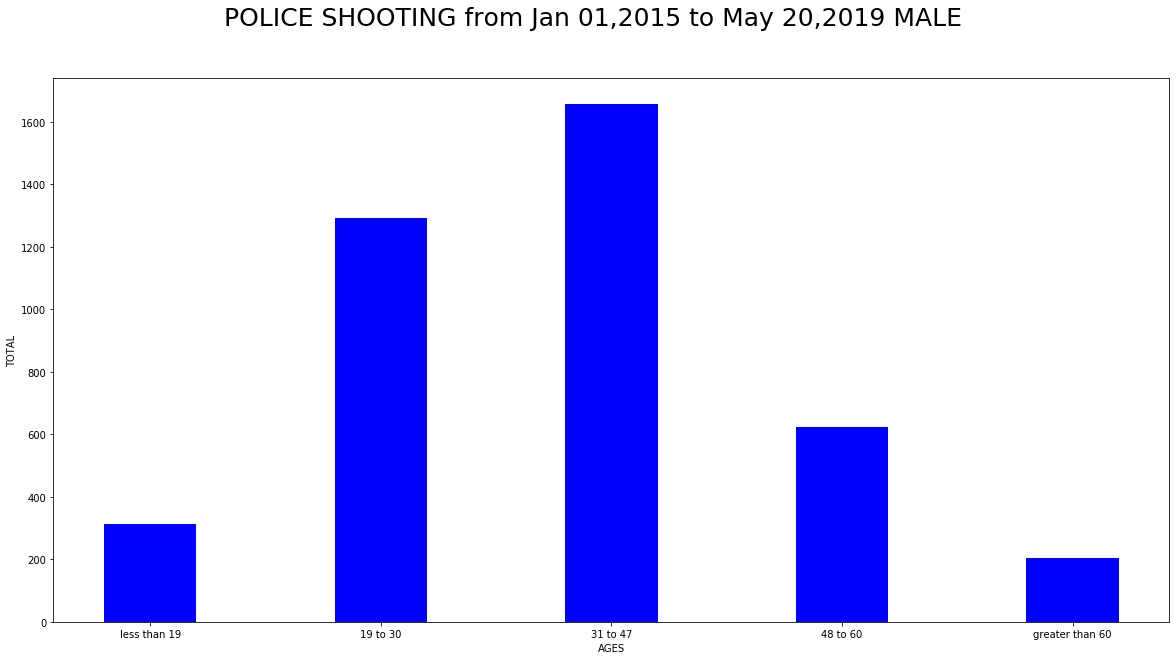

In [49]:
df_male=df.loc[df['gender']=='Male']
temp=df_male.loc[df['age'].notnull()]
temp=temp.loc[temp['age'].notnull()]
age=temp['age'].astype(int)
a18=age.where(age < 19)
a19_30=age.where((age>18) & (age<31))
a31_47=age.where((age>30) & (age<48))
a48_60=age.where((age>47) & (age<61))
a61=age.where(age > 60)
a18=a18.value_counts(dropna=True)
a19_30=a19_30.value_counts(dropna=True)
a31_47=a31_47.value_counts(dropna=True)
a48_60=a48_60.value_counts(dropna=True)
a61=a61.value_counts(dropna=True)
t1=a18.sum()
t2=a19_30.sum()
t3=a31_47.sum()
t4=a48_60.sum()
t5=a61.sum()
print('MALE AGEs')
print('   less than 19: ',t1)
print('     19  to  30: ',t2)
print('     31  to  47: ',t3)
print('     48  to  60: ',t4)
print('greater than 60: ',t5)
print('Under 30 years = ',((t1+t2)/(t1+t2+t3+t4+t5))*100,'%')
age2015_19=[t1,t2,t3,t4,t5]
plt.figure(figsize=(20,10))
plt.suptitle('POLICE SHOOTING from Jan 01,2015 to May 20,2019 MALE',fontsize=25)
ax=plt.subplot(111)
ind = np.arange(len(age2015_19))  # the x locations for the groups
width = 0.4#0.5       # the width of the bars
plbf=ax.bar(ind,age2015_19,width, color='b', align='center')
ax.set_ylabel('TOTAL')
ax.set_xlabel('AGES')
ax.set_xticks(ind)
ax.set_xticklabels(['less than 19','19 to 30','31 to 47','48 to 60','greater than 60'])
plt.show()

FEMALE AGEs
   less than 19:  15
     19  to  30:  61
     31  to  47:  79
     48  to  60:  37
greater than 60:  8
Under 30 years =  38.0 %


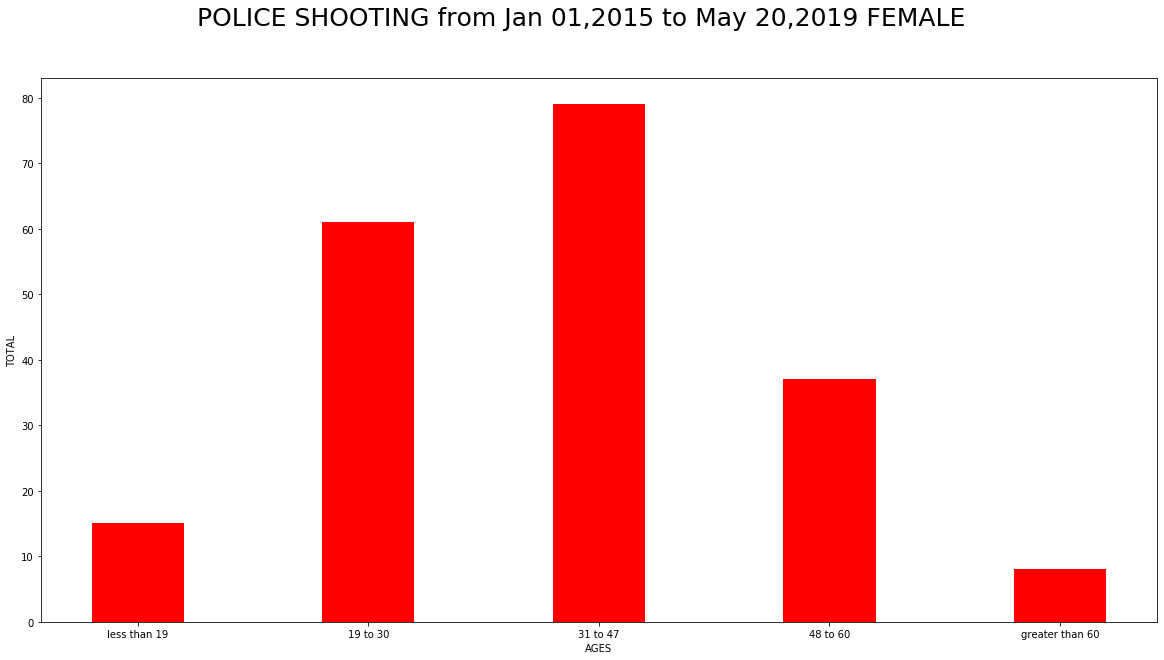

In [50]:
df_female=df.loc[df['gender']=='Female']
temp=df_female.loc[df['age'].notnull()]
temp=temp.loc[temp['age'].notnull()]
age=temp['age'].astype(int)
a18=age.where(age < 19)
a19_30=age.where((age>18) & (age<31))
a31_47=age.where((age>30) & (age<48))
a48_60=age.where((age>47) & (age<61))
a61=age.where(age > 60)
a18=a18.value_counts(dropna=True)
a19_30=a19_30.value_counts(dropna=True)
a31_47=a31_47.value_counts(dropna=True)
a48_60=a48_60.value_counts(dropna=True)
a61=a61.value_counts(dropna=True)
t1=a18.sum()
t2=a19_30.sum()
t3=a31_47.sum()
t4=a48_60.sum()
t5=a61.sum()
print('FEMALE AGEs')
print('   less than 19: ',t1)
print('     19  to  30: ',t2)
print('     31  to  47: ',t3)
print('     48  to  60: ',t4)
print('greater than 60: ',t5)
print('Under 30 years = ',((t1+t2)/(t1+t2+t3+t4+t5))*100,'%')
age2015_19=[t1,t2,t3,t4,t5]
plt.figure(figsize=(20,10))
plt.suptitle('POLICE SHOOTING from Jan 01,2015 to May 20,2019 FEMALE',fontsize=25)
ax=plt.subplot(111)
ind = np.arange(len(age2015_19))  # the x locations for the groups
width = 0.4#0.5       # the width of the bars
plbf=ax.bar(ind,age2015_19,width, color='r', align='center')
ax.set_ylabel('TOTAL')
ax.set_xlabel('AGES')
ax.set_xticks(ind)
ax.set_xticklabels(['less than 19','19 to 30','31 to 47','48 to 60','greater than 60'])
plt.show()

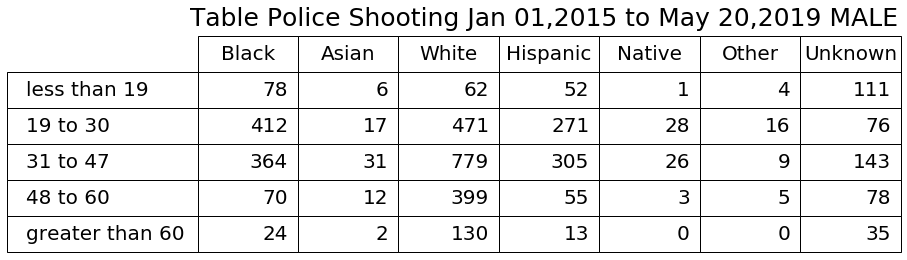

Chi-Square =  522.3917683845771
p-value =  3.6995865372182083e-95
df =  24
we can reject the null hypothesis. There is definitely some sort of relationship between ages and races

Black  =  23.18982387475538 %
Asian  =  1.663405088062622 %
White  =  45.034246575342465 %
Hispanic  =  17.025440313111545 %
Native  =  1.4187866927592954 %
Other  =  0.831702544031311 %
Unknown  =  10.836594911937377 %


In [51]:
temp=df_male.groupby(['age','race']).size()
minage=int(df_male['age'].min())
maxage=int(df_male['age'].max())

dic=temp.to_dict()
racetxt=['African American','Asian','White','Hispanic','Native American','Other','Unknown']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
l=len(racetxt)
age18cnt=[0]*l
age19_30cnt=[0]*l
age31_47cnt=[0]*l
age48_60cnt=[0]*l
age61cnt=[0]*l
for i in range(minage,19):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age18cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age61cnt[j]+=dic[(float(i),racetxt[j])]

fig=plt.figure()
plt.suptitle('Table Police Shooting Jan 01,2015 to May 20,2019 MALE',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Native','Other','Unknown']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
#Test for Independence
f_obs = np.array(table_vals)
[x,pval,DF]=stats.chi2_contingency(f_obs)[0:3]
print('Chi-Square = ',x)
print('p-value = ',pval)
print('df = ',DF)
if pval<0.05:
    print('we can reject the null hypothesis. There is definitely some sort of relationship between ages and races')
else:
    print('we cannot reject the null hypothesis. There is independent between age and race.')
print()
sumage=[]
sumrac=[0]*l
percent=[0]*l
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(racetxt)):
    print(racetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    percent[i]=(sumrac[i]/sum(sumrac))*100

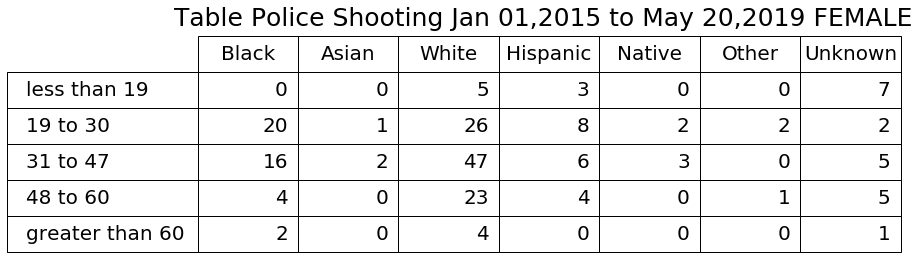

Chi-Square =  46.990406529698625
p-value =  0.0033588931970510633
df =  24
we can reject the null hypothesis. There is definitely some sort of relationship between ages and races

Black  =  21.105527638190953 %
Asian  =  1.507537688442211 %
White  =  52.76381909547738 %
Hispanic  =  10.552763819095476 %
Native  =  2.512562814070352 %
Other  =  1.507537688442211 %
Unknown  =  10.050251256281408 %


In [52]:
temp=df_female.groupby(['age','race']).size()
minage=int(df_female['age'].min())
maxage=int(df_female['age'].max())

dic=temp.to_dict()
racetxt=['African American','Asian','White','Hispanic','Native American','Other','Unknown']
agetxt=['less than 19','19 to 30','31 to 47','48 to 60','greater than 60']
l=len(racetxt)
age18cnt=[0]*l
age19_30cnt=[0]*l
age31_47cnt=[0]*l
age48_60cnt=[0]*l
age61cnt=[0]*l
for i in range(minage,19):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age18cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(19,31):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age19_30cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(31,48):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age31_47cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(48,61):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age48_60cnt[j]+=dic[(float(i),racetxt[j])]
for i in range(61,maxage):
    for j in range(7):
        if (float(i),racetxt[j]) in dic: age61cnt[j]+=dic[(float(i),racetxt[j])]

fig=plt.figure()
plt.suptitle('Table Police Shooting Jan 01,2015 to May 20,2019 FEMALE',fontsize=25)
fig.add_subplot(111)
table_vals = [age18cnt,age19_30cnt,age31_47cnt,age48_60cnt,age61cnt]
# Draw table
racetxt=['Black','Asian','White','Hispanic','Native','Other','Unknown']
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=agetxt,
                      colLabels=racetxt,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(3, 3)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()
#Test for Independence
f_obs = np.array(table_vals)
[x,pval,DF]=stats.chi2_contingency(f_obs)[0:3]
print('Chi-Square = ',x)
print('p-value = ',pval)
print('df = ',DF)
if pval<0.05:
    print('we can reject the null hypothesis. There is definitely some sort of relationship between ages and races')
else:
    print('we cannot reject the null hypothesis. There is independent between age and race.')
print()
sumage=[]
sumrac=[0]*l
percent=[0]*l
for i in table_vals:
    sumage.append(sum(i))
    for j in range(len(i)):
        sumrac[j]+=i[j]
for i in range(len(racetxt)):
    print(racetxt[i],' = ',(sumrac[i]/sum(sumrac))*100,'%')
    percent[i]=(sumrac[i]/sum(sumrac))*100

In [63]:
def showtop10(s):
    df_ca=df.loc[df['state']==s]
    temp=df_ca.groupby(['city']).size()
    print('10 Highest Police Shooting Cities in',s)
    print(temp.nlargest(10))

showtop10('CA')
showtop10('TX')
showtop10('FL')
showtop10('AL')



10 Highest Police Shooting Cities in CA
city
Los Angeles       62
Bakersfield       19
Fresno            16
San Jose          16
San Francisco     15
San Diego         14
Long Beach        13
Sacramento        10
San Bernardino    10
Santa Ana         10
dtype: int64
10 Highest Police Shooting Cities in TX
city
Houston        41
San Antonio    34
Austin         24
Dallas         11
Fort Worth     11
El Paso        10
Arlington       9
Amarillo        8
Garland         5
Irving          5
dtype: int64
10 Highest Police Shooting Cities in FL
city
Miami           26
Jacksonville    20
Orlando         15
Tampa            8
Lakeland         6
Fort Pierce      5
Deltona          4
Bradenton        3
Brooksville      3
DeLand           3
dtype: int64
10 Highest Police Shooting Cities in AL
city
Huntsville     7
Birmingham     6
Homewood       4
Phenix City    4
Mobile         3
Montgomery     3
Clanton        2
Hoover         2
Millbrook      2
Piedmont       2
dtype: int64


In [130]:
from scipy.stats import poisson
from scipy.stats import chisquare

yr2018=df.loc[df['year'] == 2018]
temp=yr2018.groupby(['date']).size()
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=365-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/365
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*365 for i in pi]
print('2018')
print("Number of Events ",x)
print("Number of Days   ",oi)
print()
oi=[oi[0],oi[1],oi[2],oi[3],oi[4],oi[5],oi[6],(oi[7]+oi[8]+oi[9])]
ei=[ei[0],ei[1],ei[2],ei[3],ei[4],ei[5],ei[6],(ei[7]+ei[8]+ei[9])]
print(oi)
print(ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)


mu = 2.717808219178082
2018
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of Days    [35, 71, 76, 70, 57, 30, 12, 7, 3, 4]

[35, 71, 76, 70, 57, 30, 12, 14]
[24.09704296460482, 65.49114142709037, 88.9961812269502, 80.62485093802245, 54.78072063734127, 29.77669856013291, 13.487892681119556, 7.553101229448462]
Chi Square = 14.45296258607464 p-value = 0.0436871040880222


In [131]:
yr2017=df.loc[df['year'] == 2017]
temp=yr2017.groupby(['date']).size()
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=365-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/365
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*365 for i in pi]
print('2017')
print("Number of Events ",x)
print("Number of Days   ",oi)
oi=[oi[0],oi[1],oi[2],oi[3],oi[4],oi[5],oi[6],(oi[7]+oi[8])]
ei=[ei[0],ei[1],ei[2],ei[3],ei[4],ei[5],ei[6],(ei[7]+ei[8])]
print('oi =',oi)
print('ei =',ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)

mu = 2.7013698630136984
2017
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of Days    [23, 67, 86, 88, 52, 28, 16, 1, 4]
oi = [23, 67, 86, 88, 52, 28, 16, 5]
ei = [24.49643239871955, 66.17392423325335, 89.38012232053121, 80.48292292972035, 54.353535622400166, 29.36580061571867, 13.221314797761915, 6.82511610616535]
Chi Square = 2.169123892522121 p-value = 0.9498895391255588


In [134]:
yr2016=df.loc[df['year'] == 2016]
temp=yr2016.groupby(['date']).size()
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=366-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/366
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*366 for i in pi]
print('2016')
print("Number of Events ",x)
print("Number of Days   ",oi)
oi=[oi[0],oi[1],oi[2],oi[3],oi[4],oi[5],oi[6],(oi[7]+oi[8])]
ei=[ei[0],ei[1],ei[2],ei[3],ei[4],ei[5],ei[6],(ei[7]+ei[8])]
print('oi =',oi)
print('ei =',ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)

mu = 2.628415300546448
2016
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of Days    [26, 76, 76, 85, 60, 27, 10, 4, 2]
oi = [26, 76, 76, 85, 60, 27, 10, 6]
ei = [26.42255582957423, 69.44945002199566, 91.27099852617464, 79.96602967411658, 52.54598397984982, 27.622533654981172, 12.100581683101952, 6.03643770594055]
Chi Square = 4.9328755016481685 p-value = 0.6681545862960605


In [137]:
yr2015=df.loc[df['year'] == 2015]
temp=yr2015.groupby(['date']).size()
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=365-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/365
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*365 for i in pi]
print('2015')
print("Number of Events ",x)
print("Number of Days   ",oi)
oi=[oi[0],oi[1],oi[2],oi[3],oi[4],oi[5],oi[6],(oi[7]+oi[8])]
ei=[ei[0],ei[1],ei[2],ei[3],ei[4],ei[5],ei[6],(ei[7]+ei[8])]
print('oi =',oi)
print('ei =',ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)

mu = 2.723287671232877
2015
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8]
Number of Days    [24, 73, 87, 69, 56, 32, 14, 8, 2]
oi = [24, 73, 87, 69, 56, 32, 14, 10]
ei = [23.96536546275825, 65.26458430131973, 88.86711889796139, 80.6702430909348, 54.92206961122549, 29.913719010168858, 13.57727703018622, 7.080209838668741]
Chi Square = 4.0283046983838355 p-value = 0.7765115464856586


In [143]:
file1 = open("KilledByPolice_2019.txt","r")    
txt=file1.read()
line=txt.splitlines()
sdate=[]
for i in line:
    sdate.append(i[0:10])
yr2019=pd.DataFrame(sdate,columns=['date'])
temp=yr2019.groupby(['date']).size()
temp

date
2019-01-01    2
2019-01-02    3
2019-01-03    6
2019-01-04    4
2019-01-05    5
             ..
2019-12-27    4
2019-12-28    5
2019-12-29    4
2019-12-30    3
2019-12-31    6
Length: 334, dtype: int64

In [147]:
tmax=max(temp)
tmin=min(temp)
oi=[0]*(tmax+1)
for k in range(tmin,tmax+1):
    for i in temp:
        if i == k:
            oi[k]+=1
oi[0]=365-len(temp)
x=[i for i in range(0,tmax+1)]
m=0
for i in range(0,tmax+1):
    m+=i*oi[i]
mu=m/365
print('mu =',mu)
pi=[poisson.pmf(i, mu) for i in range(0,tmax+1)]
ei=[i*365 for i in pi]
print('2019')
print("Number of Events ",x)
print("Number of Days   ",oi)
print()
print(ei)
oi=[oi[0],oi[1],oi[2],oi[3],oi[4],oi[5],oi[6],(oi[7]+oi[8]+oi[9])]
ei=[ei[0],ei[1],ei[2],ei[3],ei[4],ei[5],ei[6],(oi[7]+ei[8]+ei[9])]
print('oi =',oi)
print('ei =',ei)
[chi,pval]=chisquare(oi,ei)
print('Chi Square =',chi,'p-value =',pval)

mu = 2.745205479452055
2019
Number of Events  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Number of Days    [31, 61, 89, 70, 56, 33, 15, 7, 2, 1]

[23.445811717202844, 64.36357079626644, 88.34561361350546, 80.8422875257831, 55.48217267180456, 30.46199288610859, 13.937404964329142, 5.465862925345515, 1.8756146065740424, 0.5721052772563752]
oi = [31, 61, 89, 70, 56, 33, 15, 10]
ei = [23.445811717202844, 64.36357079626644, 88.34561361350546, 80.8422875257831, 55.48217267180456, 30.46199288610859, 13.937404964329142, 12.447719883830418]
Chi Square = 4.847321428296021 p-value = 0.6785890056862767
